In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import pickle


In [98]:
#load dataset and preview it

df = pd.read_csv('email_set.csv')

print(df.shape)

X = df['text']
y = df['label']

# sets a limit on number of features, and excludes basic english words and converts from raw text to vectorized numbers
vectorizer = TfidfVectorizer(
    max_features = 5000,
    min_df = 5,
    stop_words = 'english'
)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42, stratify = y )

#Convert text into numerical features because logistic regression in scikit-learn cannot work with raw-text 

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)


(83448, 2)


In [99]:
#create training model based and use it to test
model = LogisticRegression(max_iter = 100, C = 0.3)

#trains model on the 80% of the data
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

#the training accuracy is greater than the test accuracy. CLear sign of overfitting, change C parameter 


Training Accuracy: 0.9801671709757632
Testing Accuracy: 0.979089275014979
----------------------------------------
Confusion matrix displayed above
----------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7908
           1       0.97      0.99      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

----------------------------------------
5-Fold Cross-Validation Accuracy (Train Set): [0.97828041 0.97708209 0.97790593 0.97655606 0.97648116]
Mean CV Accuracy: 0.9772611299764181


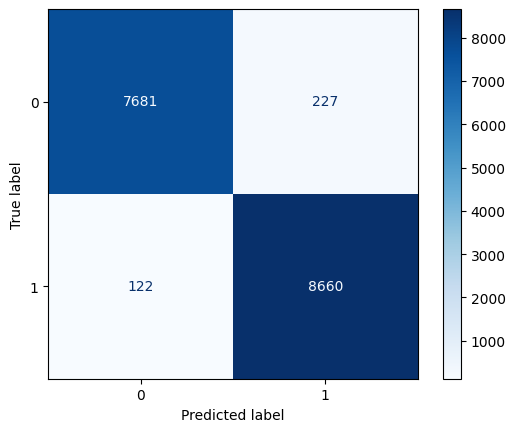

In [100]:
# evaluating the model

# --- 1. Accuracy ---
train_acc = accuracy_score(y_train, model.predict(X_train_vec))
test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("-" * 40)

# --- 2. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
print("Confusion matrix displayed above")
print("-" * 40)

# --- 3. Precision, Recall, F1-Score ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("-" * 40)

# --- 4. Cross-Validation on training set ---
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)
print("5-Fold Cross-Validation Accuracy (Train Set):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


                word  coefficients
3477           price      3.237402
3347           pills      3.152859
2606            life      3.148479
2163              hk      2.931823
2923           money      2.878045
2212            http      2.816223
3609         quality      2.706398
2303            info      2.655885
918          company      2.622338
4454          target      2.589273
272          anatrim      2.575368
37              2005      2.568708
3950            save      2.517781
36              2004      2.476328
1587  escapenumbermg      2.400089
3519         product      2.399870
2841             men      2.397252
1564      escapelong      2.349978
2828            meds      2.348287
3125          online      2.319575


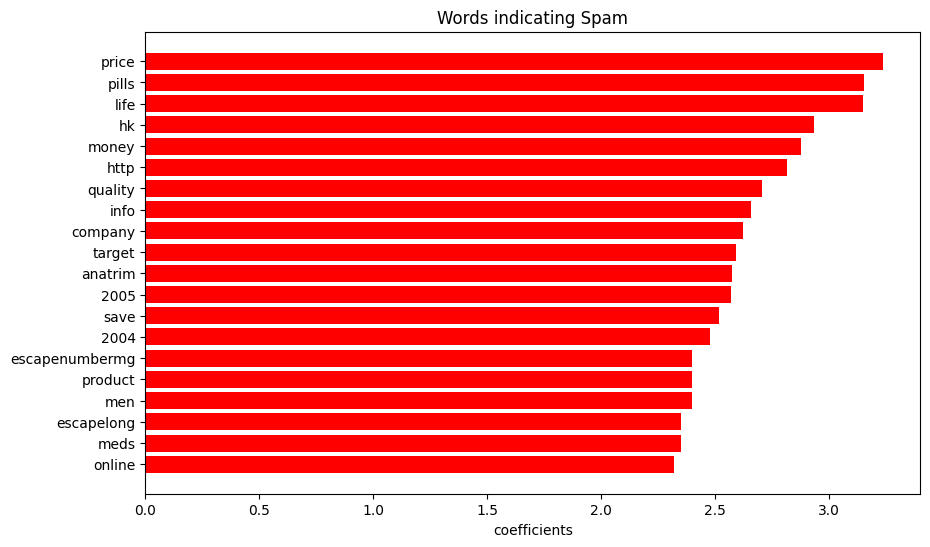

In [101]:
#identify most common words and print them out

feature_names = vectorizer.get_feature_names_out()

coefficients = model.coef_[0]


#prints out the coefficients of each word. A higher number indicates the word is more likely to indicate spam

coef_df = pd.DataFrame({

    'word': feature_names,
    'coefficients': coefficients
})


spam_words = coef_df.sort_values(by='coefficients', ascending=False).head(20)
print(spam_words)
safe_words = coef_df.sort_values(by='coefficients', ascending=True).head(20)
#print(safe_words)
plt.figure(figsize=(10,6))

plt.barh(spam_words['word'], spam_words['coefficients'], color= 'red')
plt.xlabel('coefficients')
plt.title('Words indicating Spam')
plt.gca().invert_yaxis()
plt.show()

In [103]:
#use imported pickle to save the trained logistic rergession model

with open("model/model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
